In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(1)

### 1. Obtain the MNIST dataset and normalize it for use with a classifier.

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
x_train, x_test, y_train, y_test = \
    train_test_split(mnist.data/255., mnist.target, test_size=0.2, random_state=0)

### 2. Select two different machine learning classification models

### A: logistic regression

In [4]:
# Apply Logistic regression classifier
clf_reg = LogisticRegression(solver = 'lbfgs', n_jobs=1)

### 3.A Train both models on the MNIST dataset and achieve a decent testing accuracy

In [5]:
clf_reg.fit(x_train, y_train)

# Make a prediction
y_pred = clf_reg.predict(x_test)

In [6]:
print "Mean accuracy: {0:0.2f}".format(clf_reg.score(x_test, y_test))

Mean accuracy: 0.92


### B: Random forest

In [75]:
# Apply Random forest classifier
clf_forest = RandomForestClassifier(n_estimators=50,n_jobs=1)

### 3.B Train both models on the MNIST dataset and achieve a decent testing accuracy

In [76]:
clf_forest.fit(x_train, y_train)

# Make a prediction
y_pred = clf_forest.predict(x_test)

In [77]:
print "Mean accuracy: {0:0.2f}".format(clf_forest.score(x_test, y_test))

Mean accuracy: 0.97


### 4. Using the gradient sign equation in Slide 27, generate 100 adversarial examples for each model.

In [164]:
# Helper function to visualize the images
def show_images(images, labels, n):
    plt.figure(figsize=(20,4))
    for index, (image, label) in enumerate(zip(images[0:n], labels[0:n])):
        plt.subplot(1, n, index + 1)
        plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
        plt.title('Label: %i\n' % label, fontsize = 12)
    plt.show()
    
def show_proba(classifier, images, labels, n):
    plt.figure(figsize=(20,4))
    for index, (image, label) in enumerate(zip(images[0:n], labels[0:n])):
        plt.subplot(1, n, index + 1)
        
        y_proba = classifier.predict_proba([image])[0]
        plt.bar(np.arange(10), y_proba)
        
        # print y_proba
        plt.title('Label: %i\n' % label, fontsize = 12)
    plt.show()
    
def generate(classifier, images, labels, steps):
    x_adv = []
    y_adv = []
    y_adv_proba = []
    
    for index, (image, label) in enumerate(zip(images, labels)):
        target_digits = [6,7,3,2,9,8,0,1,5,4]
        
        # One hot encoding of the label
        target = np.zeros(10)
        target[target_digits[int(label)]] = 1

        # initialize a random image
        # x = np.random.normal(.5, .15, (784))
        x = image

        # Gradient descent on the output
        for i in range(steps):
            y = classifier.predict_proba([x])[0]
            d = np.linalg.norm(target - y, 2)

            x = np.maximum(x - (0.007 * d), np.zeros(len(x)))
        
        x_adv.append(x)
        y_adv.append(classifier.predict([x]))
        y_adv_proba.append(classifier.predict_proba([x])[0])

    return x_adv, y_adv, y_adv_proba

#### Logistic regression classifier

In [160]:
# Take 100 random images for adverserial examples with Logistic regression classifier

indices = np.arange(mnist.data.shape[0])
np.random.shuffle(indices)

data_reg = mnist.data[indices]/255.
target_reg = mnist.target[indices]

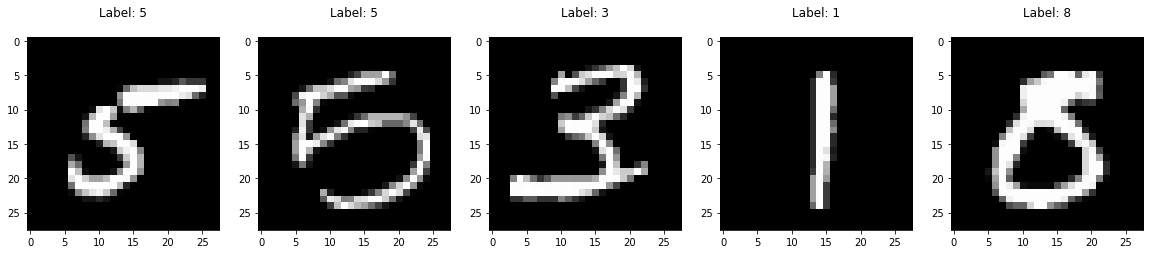

In [161]:
# Show first 5 original images
show_images(data_reg, target_reg, 5)

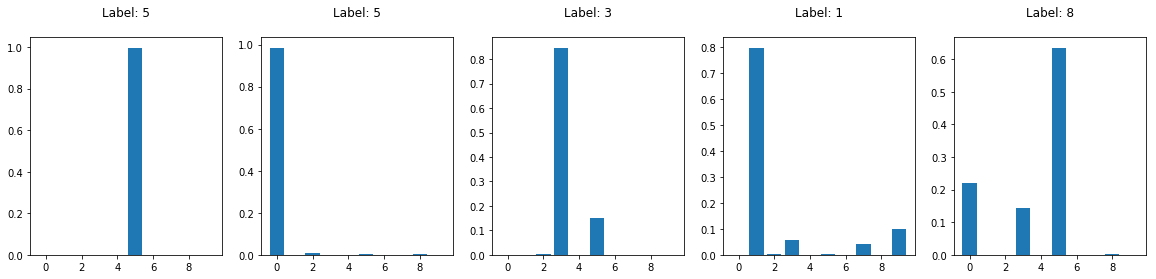

In [162]:
show_proba(clf_reg,data_reg, target_reg, 5)

In [148]:
x_adv, y_adv, y_adv_proba = generate(clf_reg, data_reg[0:100], target_reg[0:100], 70)

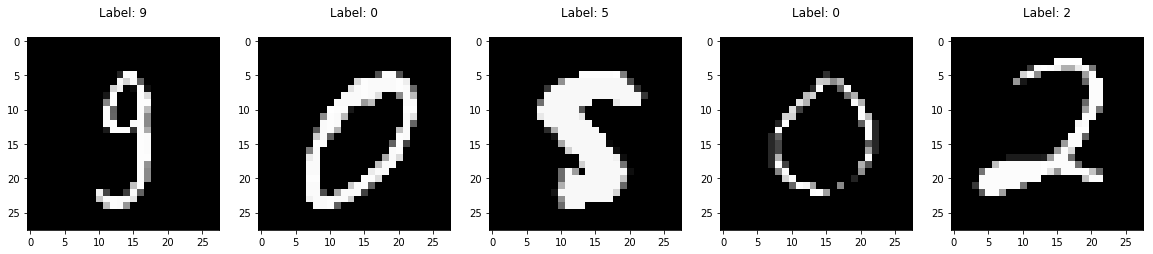

In [149]:
# Show first 5 adverserial examples
show_images(x_adv, target_reg, 5)

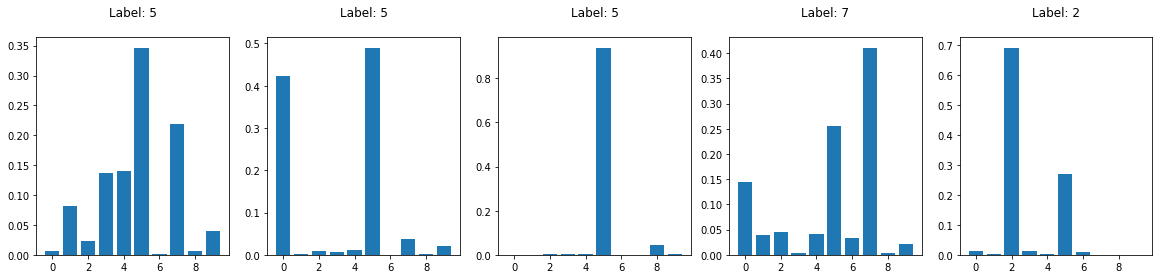

In [150]:
show_proba(clf_reg,x_adv, y_adv, 5)

In [142]:
print data_reg[90][200:220]

[0.         0.         0.         0.         0.         0.
 0.         0.32941176 0.96470588 0.98823529 0.98823529 0.45098039
 0.         0.02745098 0.32941176 0.19215686 0.89019608 0.98823529
 0.49411765 0.        ]


In [143]:
print x_adv[90][200:220]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.06916772 0.09269713 0.09269713 0.
 0.         0.         0.         0.         0.         0.09269713
 0.         0.        ]


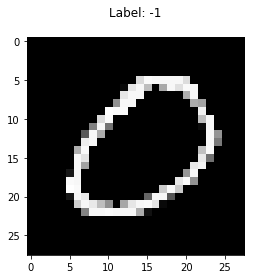

In [151]:
show_images([x_adv[90]], [-1], 1)

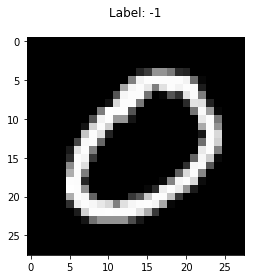

In [152]:
show_images([data_reg[90]], [-1], 1)

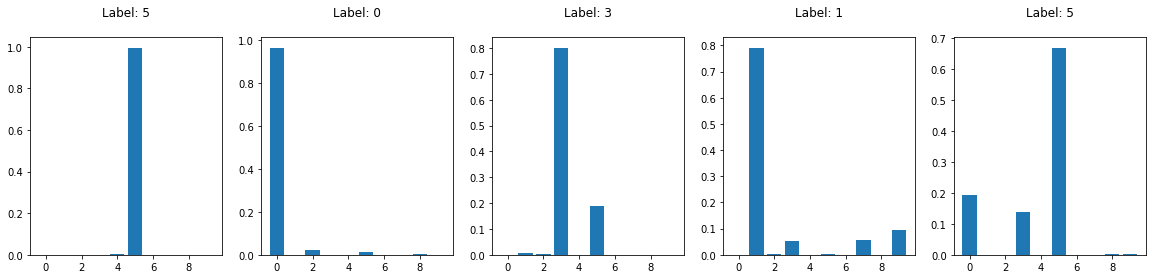

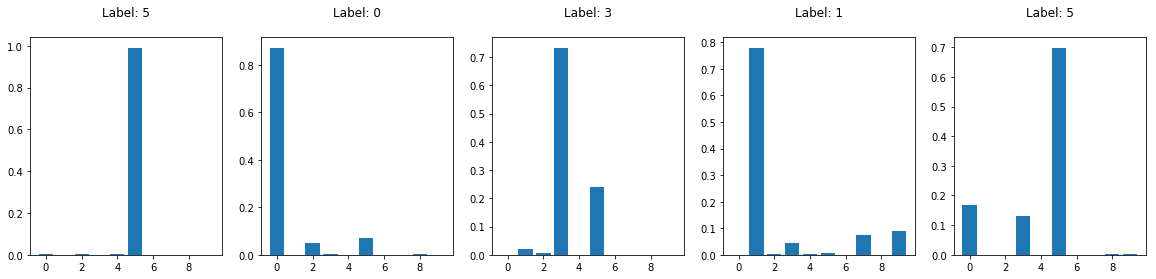

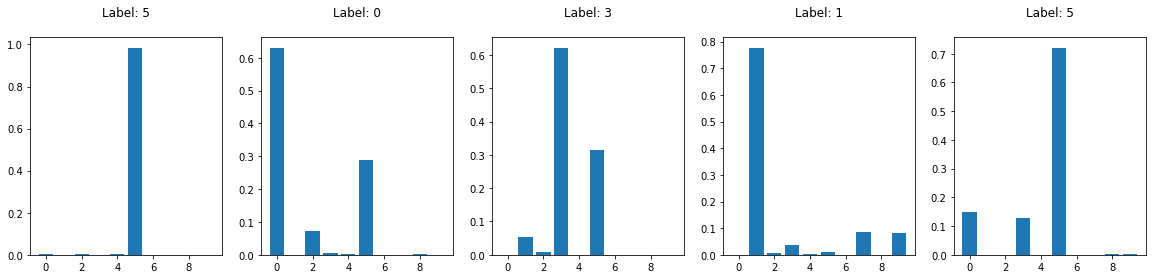

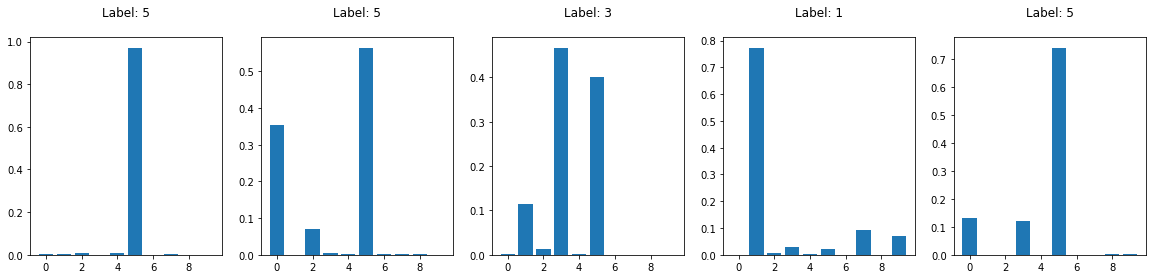

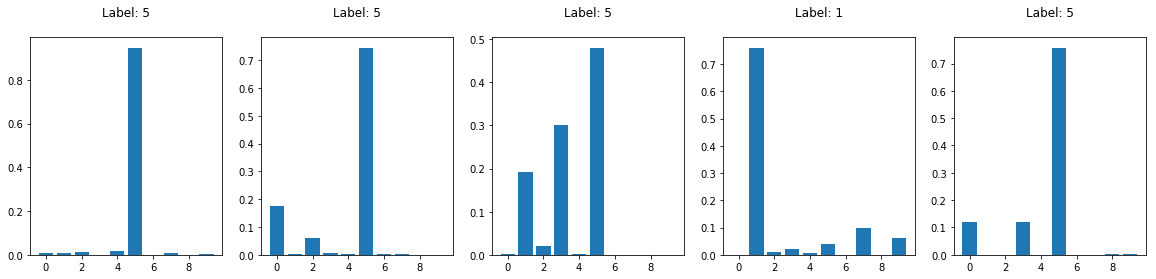

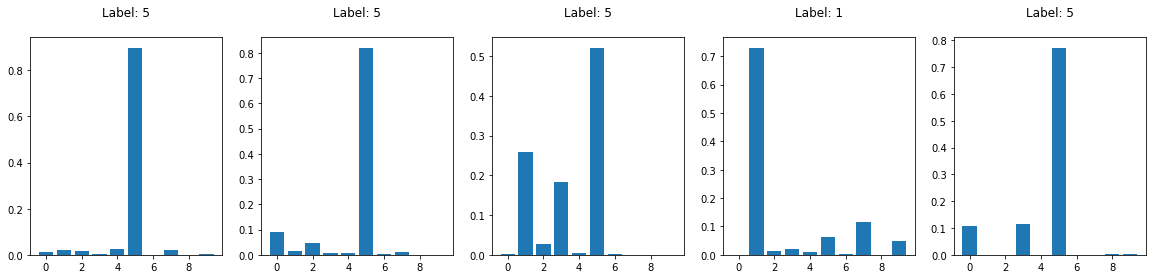

In [165]:
for i in np.arange(1, 7):
    x_adv, y_adv, y_adv_proba = generate(clf_reg, data_reg[0:100], target_reg[0:100], i*10)
    # show_images(x_adv, target_reg, 5)
    show_proba(clf_reg,x_adv, y_adv, 5)

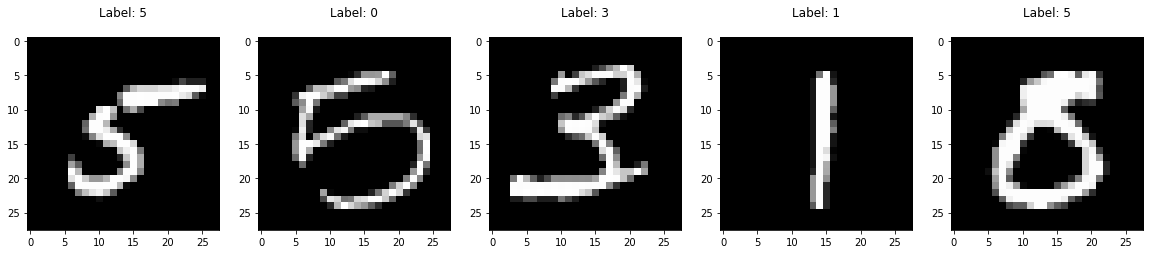

In [173]:
x_adv, y_adv, y_adv_proba = generate(clf_reg, data_reg[0:100], target_reg[0:100], 10)
show_images(x_adv, y_adv, 5)
